# Notes

Based on feedback:

* Better not to compute mean values on the three configurations
* Not really meaningful to examine the MAE and validation MAE of the last epoch


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [2]:
from ipypublish import nb_setup
# https://stackoverflow.com/a/39566040/11552622
rcparams = {
    'axes.titlesize':13,
    'axes.labelsize':9,
    'xtick.labelsize':8,
    'ytick.labelsize':8
}
plt = nb_setup.setup_matplotlib(rcparams=rcparams)
pd = nb_setup.setup_pandas()
sns.set(style='whitegrid')

# Load data, setup code

In [3]:
df = pd.read_csv('data/dnn_stats.csv')
df

hlayers  neurons  aks      loss       mae  val_loss   val_mae   RPM
0          1        8   10  0.023051  0.097784  0.022360  0.096270  4000
1          1        8   20  0.021760  0.093726  0.021038  0.091827  4000
2          1        8   40  0.023084  0.095741  0.022269  0.094381  4000
3          1        8   50  0.022321  0.093963  0.021889  0.092850  4000
4          1        8   60  0.061826  0.196905  0.059978  0.192637  4000
..       ...      ...  ...       ...       ...       ...       ...   ...
307        6       64   20  0.004578  0.040315  0.005542  0.046204  6000
308        6       64   40  0.004384  0.039444  0.006831  0.047704  6000
309        6       64   50  0.006941  0.049397  0.007911  0.049528  6000
310        6       64   60  0.007944  0.052158  0.010854  0.057522  6000
311        6       64  100  0.009835  0.058249  0.013437  0.065619  6000

[312 rows x 8 columns]

In [4]:
avg = pd.read_csv('data/dnn_stats_avg.csv')
avg

hlayers  neurons  aks      loss       mae  val_loss   val_mae
0          1        8   10  0.020345  0.089752  0.020028  0.089065
1          1        8   20  0.019610  0.086255  0.019378  0.085565
2          1        8   40  0.020054  0.086606  0.019621  0.086072
3          1        8   50  0.022311  0.091928  0.022116  0.092018
4          1        8   60  0.032435  0.119436  0.033997  0.123394
..       ...      ...  ...       ...       ...       ...       ...
99         6       64   20  0.004754  0.042383  0.007983  0.053177
100        6       64   40  0.008156  0.054468  0.014324  0.068556
101        6       64   50  0.009593  0.059480  0.016877  0.073616
102        6       64   60  0.010231  0.061014  0.018209  0.077798
103        6       64  100  0.011816  0.066621  0.022288  0.085968

[104 rows x 7 columns]

In [5]:
with open('data/dnn_stats_data.bin', 'rb') as f:
    data = pickle.load(f)

In [6]:
def plot_statistics(data, configs, rpms, display_values, fun_descr):
    nrow = len(configs)
    ncol = len(rpms)
    fig, axgrid = plt.subplots(nrow, ncol, figsize=(2.8*ncol + .5, 1.75*nrow + .5),
                              sharey='row', sharex='col')
    
    for i, (axes, config) in enumerate(zip(axgrid, configs)):
        # Plot data
        last_val = {val: [] for val in display_values}
        for rpm, a in zip(rpms, axes):
            key = (rpm, ) + config
            a.plot(data[key]['loss'], label='loss', lw=.5)
            a.plot(data[key]['val_loss'], label='val loss', lw=.5)
            # Extract last values
            for val in display_values:
                last_val[val].append(data[key][val][-1])
            #last_val['loss'].append(data[key]['loss'])
        
        
        
        # X-Label management
        # First row vs not
        if i == 0:
            axes[0].legend()
            for rpm, a in zip(rpms, axes): a.set_title(f'{rpm} RPM')
        # Last row vs not
        #if i < nrow-1:
        #    for a in axes: a.set_xticklabels([])
        #else:
        #    for a in axes: a.set_xlabel('Epochs')
        
        # Y-label management
        axes[0].set_ylabel('Loss')
        #axes[-1].yaxis.set_label_position('right')
        #axes[-1].yaxis.tick_right()
        
        #fig.align_ylabels(axes)
        
        # Text management - Compute mean values, display
        text = '\n'.join([
            'mean ' + val.replace("_", " ") + ': ' + \
            '{:.3}'.format(np.mean(last_val[val]))
            for val in display_values
        ])
        text = '\\textbf{'+fun_descr(config)+'}' + '\n' + text
        axes[0].text(-1.5, .5, text, transform=axes[0].transAxes, 
                     verticalalignment='center')
    
    for a in axgrid[-1]: a.set_xlabel('Epochs')
    # General plot properties
    fig.subplots_adjust(wspace=.05, hspace=.05)
    plt.tight_layout()

In [7]:
def df2config(df):
    return [
        (l, n, c) for l,n,c in zip(df.hlayers, df.neurons, df.aks)
    ]

## Example


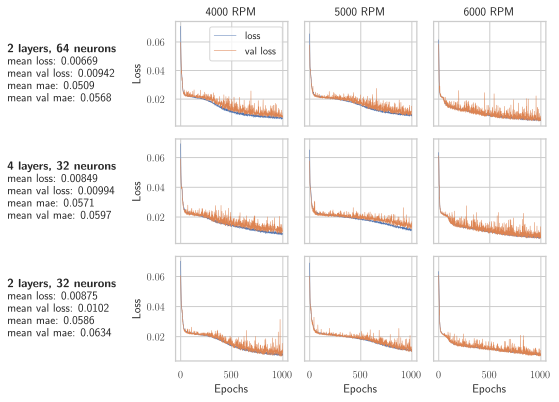

In [8]:
configs = [(2, 64, 40),
           (4, 32, 40),
           (2, 32, 40)]
fun_descr = lambda config: f'{config[0]} layers, {config[1]} neurons'
plot_statistics(data, configs, [4000, 5000, 6000], 
                ['loss', 'val_loss', 'mae', 'val_mae'], fun_descr)
#plt.savefig('figs/dnn_statistics_sorted_40aks.eps', bbox_inches='tight')

# Best architectures - 50 aks

## Mean values

1. We have 312 configurations in total, determined by the number of hidden layers (L), the number of neurons (N), the number of Fourier coefficients (C) and the pump speed (RPM). 

1. A DNN was trained for each configuration, losses were extracted

1. We computed the mean values among the different pump speeds

1. This yields 104 DNN architectures:

In [9]:
avg.iloc[np.r_[0:5, -5:0], :].rename(columns={col: col.replace('_', ' ') for col in avg.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae
0          1        8   10  0.020345  0.089752  0.020028  0.089065
1          1        8   20  0.019610  0.086255  0.019378  0.085565
2          1        8   40  0.020054  0.086606  0.019621  0.086072
3          1        8   50  0.022311  0.091928  0.022116  0.092018
4          1        8   60  0.032435  0.119436  0.033997  0.123394
99         6       64   20  0.004754  0.042383  0.007983  0.053177
100        6       64   40  0.008156  0.054468  0.014324  0.068556
101        6       64   50  0.009593  0.059480  0.016877  0.073616
102        6       64   60  0.010231  0.061014  0.018209  0.077798
103        6       64  100  0.011816  0.066621  0.022288  0.085968

We then constrain the number of Fourier coefficients, according to the value that allows a physiologically meaningful reconstruction of the DNN input signals. We choose $K=50$ and we sort the architectures by the validation MAE (mean absolute error):

In [10]:
sub = avg[avg.aks == 50].copy()
sub.sort_values('val_mae', inplace=True, ignore_index=True)
sub.head()

hlayers  neurons  aks      loss       mae  val_loss   val_mae
0        2       64   50  0.007677  0.054280  0.008846  0.058834
1        3       64   50  0.007759  0.053934  0.010532  0.059400
2        4       64   50  0.007305  0.051633  0.012596  0.064372
3        4       32   50  0.010294  0.062624  0.012229  0.065809
4        3       32   50  0.010618  0.063666  0.011313  0.065913

In [11]:
sub.rename(columns={col: col.replace('_', ' ') for col in avg.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae
0         2       64   50  0.007677  0.054280  0.008846  0.058834
1         3       64   50  0.007759  0.053934  0.010532  0.059400
2         4       64   50  0.007305  0.051633  0.012596  0.064372
3         4       32   50  0.010294  0.062624  0.012229  0.065809
4         3       32   50  0.010618  0.063666  0.011313  0.065913
5         5       32   50  0.011445  0.064776  0.013060  0.066839
6         1       64   50  0.011806  0.066666  0.014426  0.072188
7         2       32   50  0.010642  0.064050  0.014030  0.072371
8         6       32   50  0.011981  0.066575  0.014776  0.072872
9         6       64   50  0.009593  0.059480  0.016877  0.073616
10        5       16   50  0.015742  0.076669  0.015591  0.074430
11        1       32   50  0.015789  0.077337  0.016310  0.077062
12        3       16   50  0.015521  0.076483  0.016083  0.077941
13        6       16   50  0.016792  0.079643  0.016437  0.079518
14        2       16   50  0.016618  0.079102  0.016444  0.080353
15        5       64   50  0.007636  0.052779  0.018321  0.080858
16        1       16   50  0.018449  0.082600  0.018098  0.081965
17        4        8   50  0.018654  0.085154  0.018940  0.085649
18        4       16   50  0.013495  0.072828  0.018717  0.086798
19        5        8   50  0.019542  0.087273  0.019551  0.087470
20        1        8   50  0.022311  0.091928  0.022116  0.092018
21        6        8   50  0.022512  0.095566  0.022046  0.092254
22        3        8   50  0.022179  0.094159  0.022963  0.096389
23        2        8   50  0.031934  0.123937  0.031655  0.124147

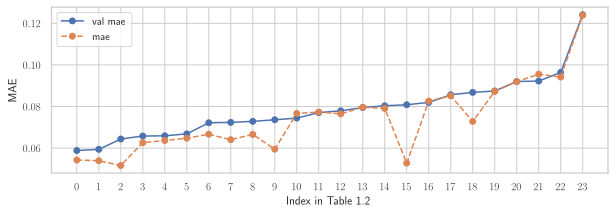

In [12]:
plt.figure(figsize=(10, 3))
plt.plot(sub.index, sub.val_mae, '-o', label='val mae')
plt.plot(sub.index, sub.mae, '--o', label='mae')
plt.ylabel('MAE')
plt.xlabel('Index in Table 1.2')
plt.xticks(sub.index)
plt.legend();

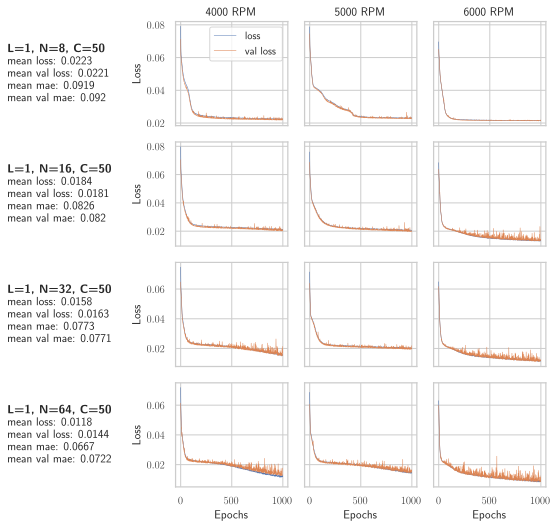

In [13]:
fun_descr = lambda config: f'L={config[0]}, N={config[1]}, C={config[2]}'
plot_statistics(data, [(1,8,50),(1,16,50),(1,32,50),(1,64,50)], [4000, 5000, 6000], 
                ['loss', 'val_loss', 'mae', 'val_mae'], fun_descr)

In [14]:
conf = df2config(sub.head(7))
conf

[(2, 64, 50),
 (3, 64, 50),
 (4, 64, 50),
 (4, 32, 50),
 (3, 32, 50),
 (5, 32, 50),
 (1, 64, 50)]

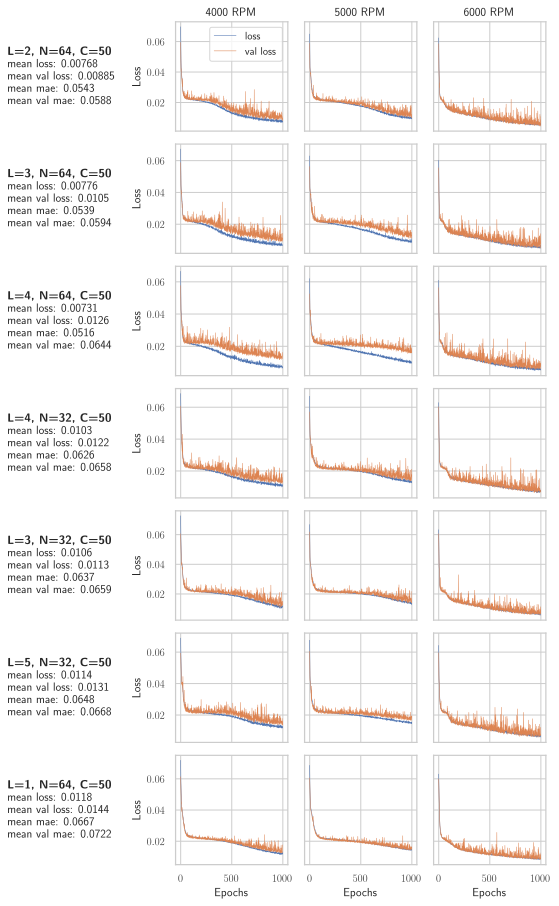

In [15]:
fun_descr = lambda config: f'L={config[0]}, N={config[1]}, C={config[2]}'
plot_statistics(data, conf, [4000, 5000, 6000], 
                ['loss', 'val_loss', 'mae', 'val_mae'], fun_descr)

In [16]:
sub

hlayers  neurons  aks      loss       mae  val_loss   val_mae
0         2       64   50  0.007677  0.054280  0.008846  0.058834
1         3       64   50  0.007759  0.053934  0.010532  0.059400
2         4       64   50  0.007305  0.051633  0.012596  0.064372
3         4       32   50  0.010294  0.062624  0.012229  0.065809
4         3       32   50  0.010618  0.063666  0.011313  0.065913
5         5       32   50  0.011445  0.064776  0.013060  0.066839
6         1       64   50  0.011806  0.066666  0.014426  0.072188
7         2       32   50  0.010642  0.064050  0.014030  0.072371
8         6       32   50  0.011981  0.066575  0.014776  0.072872
9         6       64   50  0.009593  0.059480  0.016877  0.073616
10        5       16   50  0.015742  0.076669  0.015591  0.074430
11        1       32   50  0.015789  0.077337  0.016310  0.077062
12        3       16   50  0.015521  0.076483  0.016083  0.077941
13        6       16   50  0.016792  0.079643  0.016437  0.079518
14        2       16   50  0.016618  0.079102  0.016444  0.080353
15        5       64   50  0.007636  0.052779  0.018321  0.080858
16        1       16   50  0.018449  0.082600  0.018098  0.081965
17        4        8   50  0.018654  0.085154  0.018940  0.085649
18        4       16   50  0.013495  0.072828  0.018717  0.086798
19        5        8   50  0.019542  0.087273  0.019551  0.087470
20        1        8   50  0.022311  0.091928  0.022116  0.092018
21        6        8   50  0.022512  0.095566  0.022046  0.092254
22        3        8   50  0.022179  0.094159  0.022963  0.096389
23        2        8   50  0.031934  0.123937  0.031655  0.124147

In [17]:
def plot_loss_comparison(df):
    fig, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True, sharey=True)
    axes = axes.ravel()
    hlayers = sorted(df.hlayers.unique())
    
    for L, ax in zip(hlayers, axes):
        tmp = df[df.hlayers == L].sort_values('neurons')
        ax.plot(tmp.neurons, tmp.val_loss, '-o', label='val loss')
        ax.plot(tmp.neurons, tmp.loss, '--o', label='loss')
        ax.set_title(fr'$L = {L}$')
    
    axes[0].set_xticks(sorted(df.neurons.unique()))
    axes[-1].set_xlabel('Neurons')
    axes[-2].set_xlabel('Neurons')
    for a in axes[0::2]:
        a.set_ylabel('Loss')
    plt.legend()
    plt.subplots_adjust(hspace=.3)

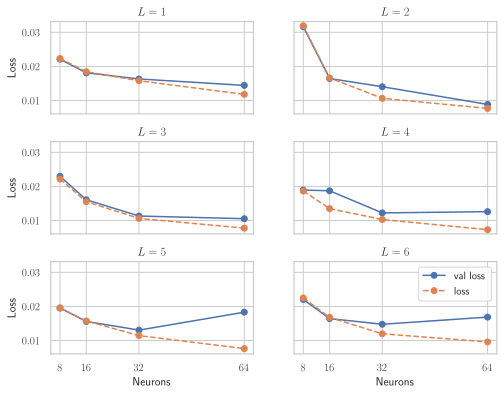

In [18]:
plot_loss_comparison(sub)

# Best architectures - non-averaged values - 50 aks


In [19]:
sub = df[df.aks == 50].reset_index(drop=True)

In [20]:
df

hlayers  neurons  aks      loss       mae  val_loss   val_mae   RPM
0          1        8   10  0.023051  0.097784  0.022360  0.096270  4000
1          1        8   20  0.021760  0.093726  0.021038  0.091827  4000
2          1        8   40  0.023084  0.095741  0.022269  0.094381  4000
3          1        8   50  0.022321  0.093963  0.021889  0.092850  4000
4          1        8   60  0.061826  0.196905  0.059978  0.192637  4000
..       ...      ...  ...       ...       ...       ...       ...   ...
307        6       64   20  0.004578  0.040315  0.005542  0.046204  6000
308        6       64   40  0.004384  0.039444  0.006831  0.047704  6000
309        6       64   50  0.006941  0.049397  0.007911  0.049528  6000
310        6       64   60  0.007944  0.052158  0.010854  0.057522  6000
311        6       64  100  0.009835  0.058249  0.013437  0.065619  6000

[312 rows x 8 columns]

In [21]:
sub.iloc[[0, 1, 2, 3, 4, -4, -3, -2, -1], :].\
    rename(columns={c: c.replace('_', ' ') for c in df.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae   RPM
0         1        8   50  0.022321  0.093963  0.021889  0.092850  4000
1         1       16   50  0.021182  0.091370  0.020185  0.088725  4000
2         1       32   50  0.015412  0.080372  0.017419  0.082172  4000
3         1       64   50  0.012283  0.070794  0.017683  0.082342  4000
4         2        8   50  0.022553  0.093632  0.022555  0.096442  4000
68        6        8   50  0.020727  0.089990  0.020405  0.085066  6000
69        6       16   50  0.011543  0.063992  0.011625  0.067748  6000
70        6       32   50  0.005945  0.046334  0.009432  0.059225  6000
71        6       64   50  0.006941  0.049397  0.007911  0.049528  6000

## 4000 RPM

In [22]:
N = 16

In [23]:
sub4000 = sub[sub.RPM == 4000].sort_values('val_mae').reset_index(drop=True)
sub4000[:N].\
    rename(columns={c: c.replace('_', ' ') for c in df.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae   RPM
0         3       64   50  0.006728  0.053302  0.010596  0.060368  4000
1         2       64   50  0.007472  0.056067  0.009592  0.064068  4000
2         4       64   50  0.006530  0.052020  0.012387  0.065065  4000
3         4       32   50  0.010480  0.065224  0.013111  0.069825  4000
4         5       32   50  0.011699  0.068223  0.013883  0.071871  4000
5         6       32   50  0.013624  0.074400  0.014077  0.072915  4000
6         5       64   50  0.006688  0.052326  0.015787  0.073268  4000
7         2       32   50  0.011123  0.067919  0.014519  0.074184  4000
8         3       32   50  0.011305  0.068144  0.012993  0.074492  4000
9         6       64   50  0.008186  0.057522  0.019388  0.082023  4000
10        1       32   50  0.015412  0.080372  0.017419  0.082172  4000
11        1       64   50  0.012283  0.070794  0.017683  0.082342  4000
12        6       16   50  0.018132  0.085908  0.017375  0.082590  4000
13        5       16   50  0.019926  0.088464  0.019952  0.085693  4000
14        3       16   50  0.019560  0.087957  0.020107  0.088140  4000
15        1       16   50  0.021182  0.091370  0.020185  0.088725  4000

In [24]:
def plot_statistics(data, configs, fun_descr, rpm, ymin=0.005, ymax=.03):
    ncol = 4
    nrow = len(configs) // ncol
    if len(configs) % ncol != 0:
        nrow += 1
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(9, 1.65*nrow + .5),
                             sharex=True, sharey=True)
    
    #Nepochs = len(next(iter(data.values()))['loss'])
    #rng = range(low, Nepochs)
    for a, conf in zip(axes.ravel(), configs):
        key = (rpm, ) + conf
        a.plot(data[key]['loss'], label='loss', lw=.6)
        a.plot(data[key]['val_loss'], label='val loss', lw=.6)
        a.set_title(fun_descr(conf))
    
    for a in axes[-1]:
        a.set_xlabel('Epochs')
        #a.set_xticks([50, 500, 1000])
    for a in axes[:, 0]:
        a.set_ylabel('Loss')
    
    axes[0,0].legend()
    axes[0,0].axis(ymin=ymin, ymax=ymax)
    plt.subplots_adjust(wspace=.1, hspace=.3)
    plt.tight_layout()
    #plt.margins(0, 0)

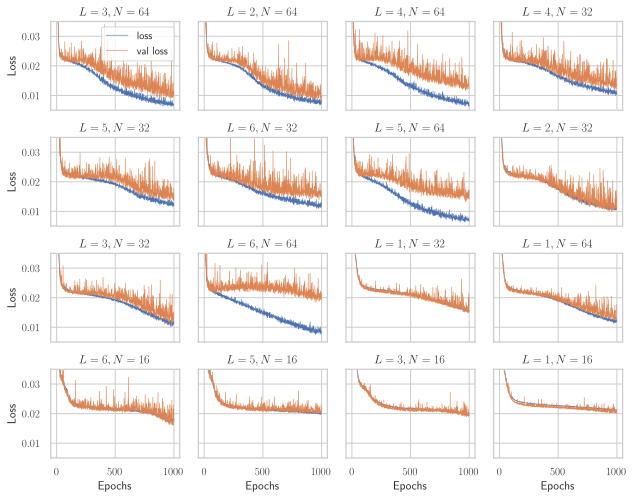

In [25]:
configs = df2config(sub4000[:N])
descfun = lambda conf: f'$L={conf[0]}, N = {conf[1]}$'
plot_statistics(data, configs, descfun, 4000, ymin=0.005, ymax=0.035)

## 5000 RPM

In [26]:
sub5000 = sub[sub.RPM == 5000].sort_values('val_mae').reset_index(drop=True)
sub5000[:N].\
    rename(columns={c: c.replace('_', ' ') for c in df.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae   RPM
0         2       64   50  0.010378  0.063524  0.011786  0.066765  5000
1         3       64   50  0.009609  0.060367  0.013223  0.068012  5000
2         4       64   50  0.010120  0.060604  0.015853  0.073632  5000
3         3       32   50  0.014128  0.073664  0.014204  0.074150  5000
4         1       64   50  0.014508  0.074412  0.016565  0.079207  5000
5         4       32   50  0.013369  0.072912  0.016487  0.079339  5000
6         5       32   50  0.015551  0.076280  0.018324  0.080794  5000
7         2       16   50  0.018050  0.084117  0.017702  0.082157  5000
8         5       16   50  0.018482  0.083919  0.019149  0.085084  5000
9         1       32   50  0.020104  0.087886  0.019567  0.085382  5000
10        3       16   50  0.018313  0.084315  0.018941  0.086039  5000
11        6       32   50  0.016374  0.078992  0.020818  0.086475  5000
12        5        8   50  0.021446  0.089733  0.020846  0.086485  5000
13        1       16   50  0.020615  0.089358  0.019719  0.087426  5000
14        6       16   50  0.020701  0.089029  0.020311  0.088218  5000
15        6       64   50  0.013654  0.071520  0.023331  0.089298  5000

In [27]:
sub5000

hlayers  neurons  aks      loss       mae  val_loss   val_mae   RPM
0         2       64   50  0.010378  0.063524  0.011786  0.066765  5000
1         3       64   50  0.009609  0.060367  0.013223  0.068012  5000
2         4       64   50  0.010120  0.060604  0.015853  0.073632  5000
3         3       32   50  0.014128  0.073664  0.014204  0.074150  5000
4         1       64   50  0.014508  0.074412  0.016565  0.079207  5000
5         4       32   50  0.013369  0.072912  0.016487  0.079339  5000
6         5       32   50  0.015551  0.076280  0.018324  0.080794  5000
7         2       16   50  0.018050  0.084117  0.017702  0.082157  5000
8         5       16   50  0.018482  0.083919  0.019149  0.085084  5000
9         1       32   50  0.020104  0.087886  0.019567  0.085382  5000
10        3       16   50  0.018313  0.084315  0.018941  0.086039  5000
11        6       32   50  0.016374  0.078992  0.020818  0.086475  5000
12        5        8   50  0.021446  0.089733  0.020846  0.086485  5000
13        1       16   50  0.020615  0.089358  0.019719  0.087426  5000
14        6       16   50  0.020701  0.089029  0.020311  0.088218  5000
15        6       64   50  0.013654  0.071520  0.023331  0.089298  5000
16        2       32   50  0.013886  0.073656  0.020613  0.090530  5000
17        1        8   50  0.023096  0.095755  0.022988  0.096746  5000
18        6        8   50  0.024686  0.101612  0.023856  0.098004  5000
19        4        8   50  0.023762  0.098313  0.023279  0.098331  5000
20        5       64   50  0.011634  0.066001  0.024197  0.099336  5000
21        4       16   50  0.014969  0.076957  0.026351  0.103603  5000
22        3        8   50  0.024424  0.101222  0.024975  0.104478  5000
23        2        8   50  0.042488  0.150703  0.042102  0.149927  5000

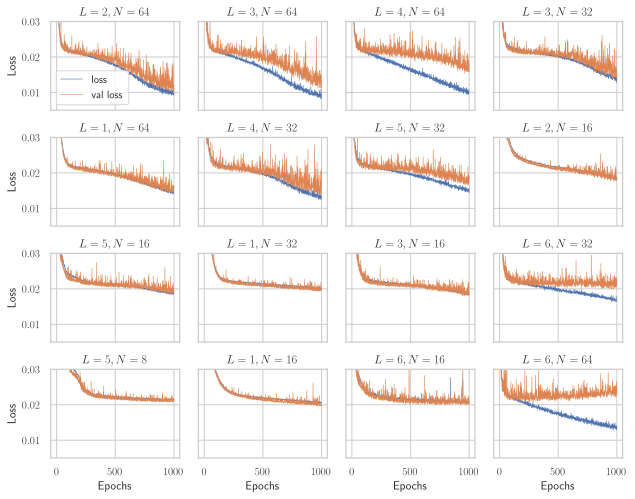

In [28]:
configs = df2config(sub5000[:N])
plot_statistics(data, configs, descfun, 5000)

## 6000 RPM


In [29]:
sub6000 = sub[sub.RPM == 6000].sort_values('val_mae').reset_index(drop=True)
sub6000[:N].\
    rename(columns={c: c.replace('_', ' ') for c in df.columns})

hlayers  neurons  aks      loss       mae  val loss   val mae   RPM
0         2       64   50  0.005181  0.043249  0.005159  0.045670  6000
1         5       32   50  0.007084  0.049824  0.006973  0.047851  6000
2         4       32   50  0.007034  0.049737  0.007090  0.048263  6000
3         3       32   50  0.006422  0.049190  0.006743  0.049096  6000
4         6       64   50  0.006941  0.049397  0.007911  0.049528  6000
5         3       64   50  0.006940  0.048133  0.007778  0.049821  6000
6         2       32   50  0.006916  0.050574  0.006959  0.052399  6000
7         5       16   50  0.008818  0.057624  0.007672  0.052513  6000
8         4       64   50  0.005265  0.042274  0.009548  0.054419  6000
9         1       64   50  0.008628  0.054793  0.009029  0.055016  6000
10        6       32   50  0.005945  0.046334  0.009432  0.059225  6000
11        3       16   50  0.008690  0.057176  0.009201  0.059642  6000
12        4       16   50  0.009838  0.060474  0.009371  0.059773  6000
13        2       16   50  0.010251  0.061038  0.009657  0.062809  6000
14        1       32   50  0.011850  0.063754  0.011942  0.063630  6000
15        4        8   50  0.012104  0.066705  0.013197  0.066897  6000

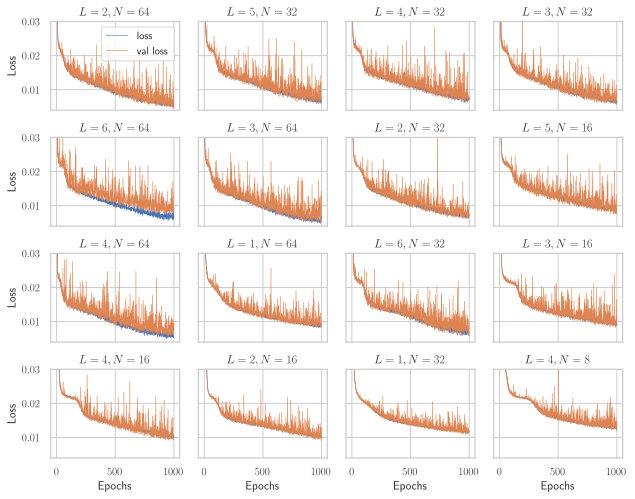

In [30]:
configs = df2config(sub6000[:N])
plot_statistics(data, configs, descfun, 6000, ymin=.004)